In [2]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.cluster import KMeans
movies_df= pd.read_csv("assets/Comprehensive IMDb Data.csv")

In [3]:
movies_df.columns
print(len(movies_df.index))


222569


In [4]:
print(movies_df.columns)

Index(['titleId', 'title', 'rating', 'region', 'genre', 'released', 'year',
       'month', 'day', 'score', 'director', 'writer', 'star', 'country',
       'budget', 'gross', 'company', 'runtime', 'category', 'nconst',
       'primaryName', 'knownForTitles'],
      dtype='object')


In [5]:
movies_df = movies_df.drop_duplicates(subset=['title'])
movies_df = movies_df.drop(['knownForTitles', 'month', 'day', 'primaryName'], axis=1)
print(movies_df.head(5))

      titleId                                           title rating region  \
0   tt0081505                                     The Shining      R     US   
17  tt0080453                                 The Blue Lagoon      R     US   
34  tt0080684  Star Wars: Episode V - The Empire Strikes Back     PG     US   
44  tt0080339                                       Airplane!     PG     US   
54  tt0080487                                      Caddyshack      R     US   

        genre    released  year  score         director  \
0       Drama  1980-06-13  1980    8.4  Stanley Kubrick   
17  Adventure  1980-07-02  1980    5.8   Randal Kleiser   
34     Action  1980-06-20  1980    8.7   Irvin Kershner   
44     Comedy  1980-07-02  1980    7.7     Jim Abrahams   
54     Comedy  1980-07-25  1980    7.3     Harold Ramis   

                     writer            star         country      budget  \
0              Stephen King  Jack Nicholson  United Kingdom  19000000.0   
17  Henry De Vere St

In [6]:
movies_df['profit'] = movies_df['gross'] - movies_df['budget']
movies_df['profit'] = movies_df.index
result = movies_df.dtypes

print("Output:")
print(result)

Output:
titleId      object
title        object
rating       object
region       object
genre        object
released     object
year          int64
score       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
category     object
nconst       object
profit        int64
dtype: object


<AxesSubplot:xlabel='score', ylabel='Density'>

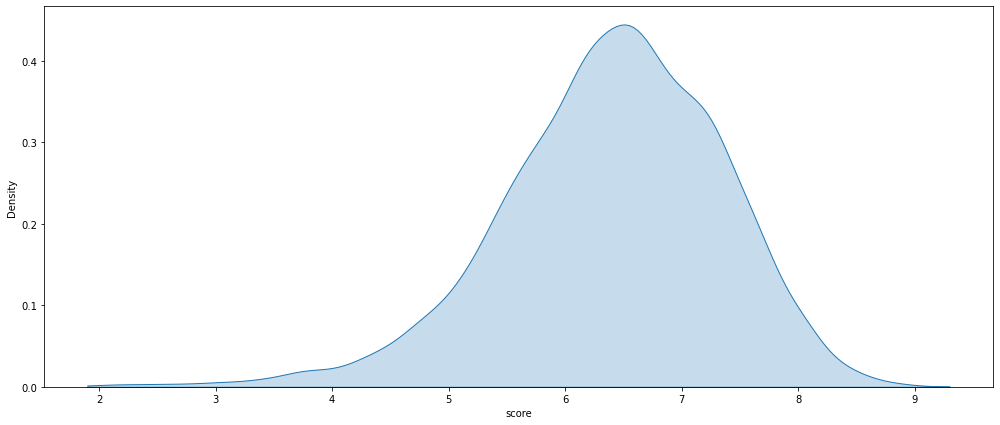

In [7]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.kdeplot(data=movies_df, x="score", bw_adjust=1, cut=0, fill=True, ax=ax)


<AxesSubplot:xlabel='profit', ylabel='score'>

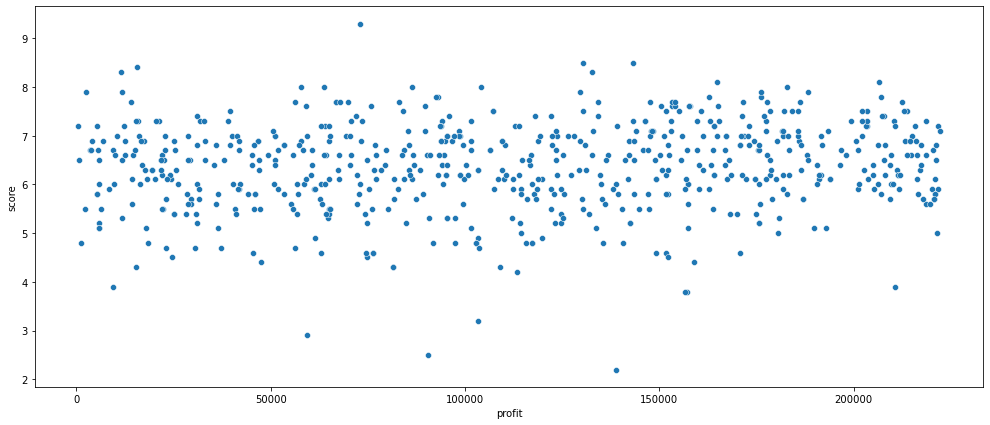

In [32]:
fig, ax = plt.subplots(figsize=(17, 7))
movies_df = movies_df.drop_duplicates(subset=['title'])

sample_df = movies_df.sample(frac=0.09, replace=True, random_state=1)

sns.scatterplot(data=sample_df, x="profit", y="score", ax = ax)


In [9]:
a = movies_df['genre'].unique()
print(sorted(a))
# g = sns.FacetGrid(movies_df, col="genre")
# g.map(sns.kdeplot, "tip")

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'Western']


In [10]:
movies_df['genre'].value_counts()

Comedy       2107
Action       1581
Drama        1395
Crime         516
Biography     413
Adventure     401
Animation     311
Horror        282
Fantasy        42
Mystery        18
Thriller       10
Family         10
Romance         8
Sci-Fi          6
Western         3
Musical         2
Music           1
Sport           1
Name: genre, dtype: int64

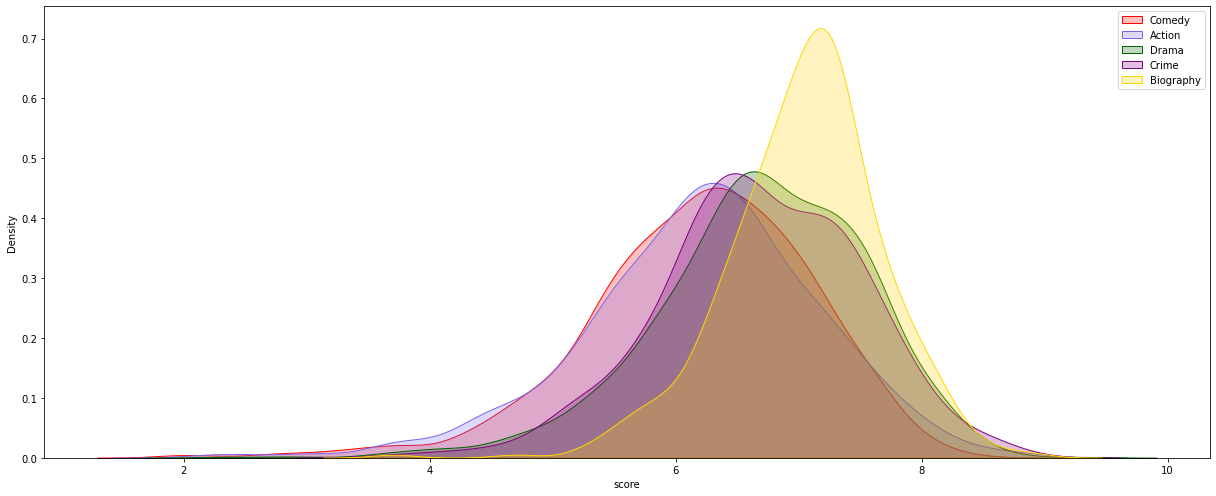

In [30]:
# comedy_genre_df = movies_df[movies_df["genre"] == 'Crime']

# fig, ax = plt.subplots(figsize=(17, 7))
# sns.kdeplot(data=comedy_genre_df, x="score", bw_adjust=1, cut=0, fill=True, ax=ax)


fig, ax = plt.subplots(figsize=(17, 7))
sns.kdeplot(data=movies_df[movies_df["genre"] == 'Comedy'],x = "score",color='red', label='Comedy', fill=True, ax=ax)
sns.kdeplot(data=movies_df[movies_df["genre"] == 'Action'], x = "score",color='mediumslateblue', fill=True, label='Action', ax=ax)
sns.kdeplot(data=movies_df[movies_df["genre"] == 'Drama'], x = "score",color='darkgreen', fill=True, label='Drama', ax=ax)
sns.kdeplot(data=movies_df[movies_df["genre"] == 'Crime'], x = "score",color='purple', fill=True, label='Crime', ax=ax)
sns.kdeplot(data=movies_df[movies_df["genre"] == 'Biography'], x = "score",color='gold', fill=True, label='Biography', ax=ax)

ax.legend()
plt.tight_layout()

plt.show()